In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score


train = pd.read_csv('Train_Set.csv') #, delimiter=',', dtype=None, encoding=None )

train['class_label'] = train['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
train_x = train.iloc[1:,:-1]
train_y = train.iloc[1:,-1]

test = pd.read_csv('Test_Set.csv') #, delimiter = ',', dtype = None, encoding = None)
test['class_label'] = test['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
test_x = test.iloc[1:,:-1 ]
test_y = test.iloc[1:,-1]


undersample = RandomUnderSampler(sampling_strategy = 1)

train_x , train_y = undersample.fit_resample(train_x, train_y)
test_x, test_y = undersample.fit_resample(test_x, test_y)

def train_knn_classifier(train_x, train_y, n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_x, train_y)
    return knn

def evaluate_classifier(clf, test_x, test_y):
    predictions = clf.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    return accuracy

def cross_validate_classifier(clf, train_x, train_y, cv=5):
    cv_scores = cross_val_score(clf, train_x, train_y, cv=cv)
    return cv_scores

def grid_search_best_params(param_grid, train_x, train_y, cv=5):
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=cv)
    grid_search.fit(train_x, train_y)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    return best_params, best_score

C:\Users\haris\AppData\Local\Temp\ipykernel_24836\2196339108.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['class_label'] = train['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
C:\Users\haris\AppData\Local\Temp\ipykernel_24836\2196339108.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['class_label'] = test['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late s

In [22]:
knn = train_knn_classifier(train_x, train_y)
accuracy = evaluate_classifier(knn, test_x, test_y)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.6375


In [23]:
cv_scores = cross_validate_classifier(knn, train_x, train_y)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.625      0.70833333 0.625      0.73913043 0.52173913]
Mean CV score: 0.643840579710145


find cv why 5

In [26]:
# Perform grid search for best parameters
param_grid = {'n_neighbors': range(1, 25)}
best_params, best_score = grid_search_best_params(param_grid, train_x, train_y)
print("Best parameters:", best_params)
print("Best CV score:", best_score)

Best parameters: {'n_neighbors': 7}
Best CV score: 0.6605072463768116


In [24]:
param_grid = {'n_neighbors': range(1, 25)}
best_params, best_score = grid_search_best_params(param_grid, train_x, train_y)
print("Best parameters:", best_params)
print("Best CV score:", best_score)

Best parameters: {'n_neighbors': 7}
Best CV score: 0.6605072463768116


In [25]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(train_x,train_y)

#show first 5 model predictions on the test data
knn.predict(test_x)[0:5]

#check accuracy of our model on the test data
knn.score(test_x, test_y)

0.6375

In [11]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, train_x, train_y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.5        0.41666667 0.54166667 0.39130435 0.52173913]
cv_scores mean:0.4742753623188406


In [16]:
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv = 5)

knn_gscv.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [17]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [13]:
knn_gscv.best_score_

0.6706521739130434

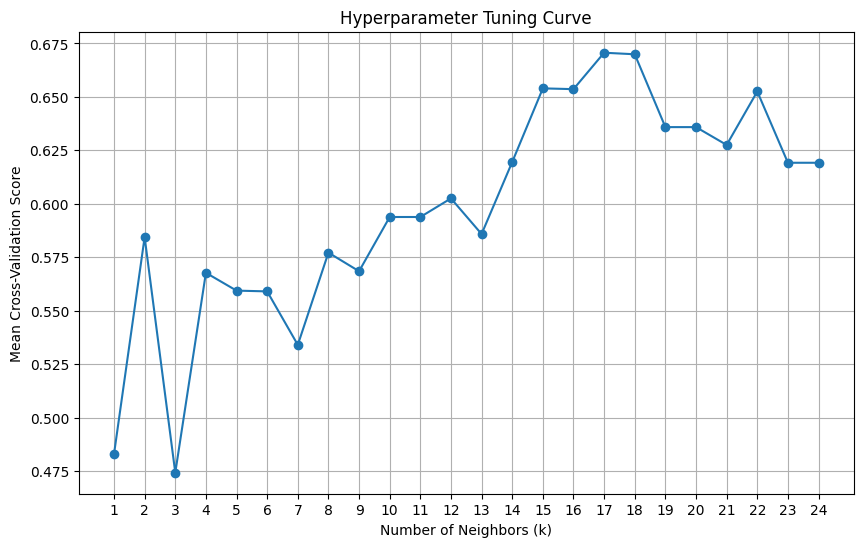

In [28]:
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['param_n_neighbors'].data.astype(int)

plt.figure(figsize=(10, 6))
plt.plot(params, means, marker='o', linestyle='-')
plt.title('Hyperparameter Tuning Curve')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(np.arange(1, 25, step=1))  # Adjust the range of x-axis ticks as needed
plt.grid(True)
plt.show()